<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

<br><br>
## <strong>1 금융 시계열 데이터
1. 금융 데이터 수집하기
1. 테이블 결측치 처리하기
1. 정규화 처리하기

<br>
### **01 시계열 데이터 수집하기**
! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade
1. https://github.com/pydata/pandas-datareader


In [12]:
# %matplotlib inline

# from pandas_datareader import get_data_yahoo

# samsung = get_data_yahoo('005930.KS', '2017-01', '2018-01')
# samsung.Close.plot()

In [13]:
# samsung.head()

In [14]:
# samsung['2017-07'].head()

In [1]:
# from pandas_datareader import get_data_yahoo

# start_date = '2013-01-01' 
# #startdate를 1996년으로 설정해두면 가장 오래된 데이터부터 전부 가져올 수 있다.

# codes = ['GM', 'KO', '005930.KS', '031510.KQ']

# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)
# prices.head(3)

In [2]:
# prices.to_csv('./data/stock_data.csv', encoding='ms949')
# print('done')

In [15]:
# 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
import pandas as pd
import numpy as np
prices = pd.read_csv('./data/stock_data.csv', encoding='ms949')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2013-01-02 to 2018-06-05
Data columns (total 4 columns):
000660.KS    1406 non-null float64
005930.KS    1406 non-null float64
GM           1406 non-null float64
KO           1406 non-null float64
dtypes: float64(4)
memory usage: 54.9 KB


<br><br><br>
## ** 5 몬테카를로 시뮬레이션**
1. 랜덤한 숫자묶음을 대입하여, **결정론적 모델**을 반복적으로 평가한다
1. 결과들을 분석하여 **가장 가능성이 높은 하나**를 출력한다
1. 모델이 복잡하고, **선형적이지 않으며**, 불확실한 파라미터 쌍을 1개 이상 포함하는 모델의 평가시 사용 (공식으로 바로 찾기 어려운 문제일수록 적합하다)

<br>
### **01 30명 중에 생일이 같은 사람들이 존재할 확률을 계산**
1. 찾는 공식은 뭐가있지... 잘모르겠다
1. 그럼 우선 해보고 판단해보자

In [89]:
import numpy as np
np.random.randint(100) 

46

In [90]:
# 생일을 찾는 템플릿 만들기
year = [0] * 365           # [0,0,0,...] : 0 을 365 개 갖는 list                  

In [91]:
# 임의의 생일데이터를 템플릿에 기록하기
new_Day        = np.random.randint(365)  
year[new_Day] += 1     # 해당 index 에 1 을 입력
have_SameBday  = False # 값 초기화

In [92]:
# 웨어서처럼 356개중 1개씩 찍는 작업을 30번 반복한다
for i in range(30):
    new_Day        = np.random.randint(365)  
    year[new_Day] += 1     # 해당 index 에 1 을 입력
have_SameBday  = False # 값 초기화
have_SameBday

False

In [93]:
# 위의 반복결과 2번이상 찍힌점이 있는지를 확인한다
for num in year:           # 전체 365개의 난수를 돌면서 
    if num > 1:            # 30번 찍었을 때 2번 같은 위치 입력 : 2를 찾는다
        have_SameBday = True
have_SameBday

True

In [94]:
# 테스트 결과 이번에 난수로 뽑은 30명 중에는 같은 생일인 사람이 존재했다
# 이번의 Test 결과를 저장한다
SameBirth = 0
if have_SameBday == True:
    SameBirth += 1
SameBirth

1

In [95]:
# 위의실험을 25,000번 반복한다
# 전체 365개의 list 인덱스 데이터를 생성한 뒤
# 난수로 인덱스에 1을 1번씩 찍을 때, 2번 찍힌 점을 찾는다
import numpy as np
Trials    = 10000
student   = 30
SameBirth = 0                  # 생일이 같은 학생수 Counting 초기화

for trial in range(Trials):
    year = [0] * 365           # [0,0,0,...] : 0 을 365 개 갖는 list                  
    
    for i in range(student):
        new_Day        = np.random.randint(365)  
        year[new_Day] += 1     # 해당 index 에 1 을 입력
        have_SameBday  = False # 값 초기화

    for num in year:           # 전체 365개의 난수를 돌면서 
        if num > 1:            # 30번 찍었을 때 2번 같은 위치 입력 : 2를 찾는다
            have_SameBday = True

    if have_SameBday == True:
        SameBirth += 1
    prob = float(SameBirth) / float(Trials)
        
    if trial % 999 == 0:
        print("{:4}\'th test {} 명중 2명의 생일이 같을확률 : {}".format(trial, student, prob))

   0'th test 30 명중 2명의 생일이 같을확률 : 0.0001
 999'th test 30 명중 2명의 생일이 같을확률 : 0.0716
1998'th test 30 명중 2명의 생일이 같을확률 : 0.1444
2997'th test 30 명중 2명의 생일이 같을확률 : 0.2134
3996'th test 30 명중 2명의 생일이 같을확률 : 0.2834
4995'th test 30 명중 2명의 생일이 같을확률 : 0.3515
5994'th test 30 명중 2명의 생일이 같을확률 : 0.4223
6993'th test 30 명중 2명의 생일이 같을확률 : 0.4928
7992'th test 30 명중 2명의 생일이 같을확률 : 0.5609
8991'th test 30 명중 2명의 생일이 같을확률 : 0.6336
9990'th test 30 명중 2명의 생일이 같을확률 : 0.7028


In [96]:
# 실험결과 
# 전체반 인원이 30명일때, 생일이 같은 사람이 존재할 확률은 70%가 된다

<br>
### **02 금융상품들의 포트폴리오 평가**
예상 수익률과 변동성 계산

In [97]:
# 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
import pandas as pd
import numpy as np
prices = pd.read_csv('./data/stock_data.csv', encoding='ms949')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2013-01-02 to 2018-06-05
Data columns (total 4 columns):
000660.KS    1406 non-null float64
005930.KS    1406 non-null float64
GM           1406 non-null float64
KO           1406 non-null float64
dtypes: float64(4)
memory usage: 54.9 KB


In [98]:
# 1년 데이터를 기준으로 계산한다
prices = prices['2017']
prices.shape

(259, 4)

In [99]:
prices = prices.resample('B').mean()
prices.shape

(260, 4)

In [100]:
prices = prices.fillna(method='ffill')
prices.isnull().sum()

000660.KS    0
005930.KS    0
GM           0
KO           0
dtype: int64

In [101]:
prices.sort_index(inplace=True)
prices.tail(3)

,000660.KS,005930.KS,GM,KO
Date,,,,
2017-12-27,75100.0,49360.0,41.310001,45.930000
2017-12-28,76500.0,50960.0,41.380001,45.720001
2017-12-29,76500.0,50960.0,40.990002,45.880001


## **공분산 Cov(X,Y)  , $\sigma$ **
[참고 사이트](http://www.walterz.net/2017/08/09/%ED%86%B5%EA%B3%84%ED%95%99-%EB%B6%84%EC%82%B0-%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8-%EA%B3%B5%EB%B6%84%EC%82%B0/)
**두 자산이 주변 환경에 따라 얼마나 큰 차이로 변동**이 생기는지 측정할 때 사용되는 것이 공분산과 상관계수다.
1. **표준편차**는 분산의 제곱근으로 구할 수 있으며 **한 가지 자산에 대한 위험**을 측정하는데 사용
1. **공분산**은 **두 자산(또는 여럿)의 표준편차**를 이용하여 구할 수 있으며 두 자산에 대한 관계를 규명하는데 사용

<img src="https://i0.wp.com/www.walterz.net/wp-content/uploads/2017/08/%EC%88%98%EC%8B%9D10.gif?resize=340%2C68" align="left">

In [102]:
#  여러 종목의 운동을 비교하여 분산을 비교측정
portfolio_rate     = [0.5, 0.2, 0.2, 0.1]
weights            = np.asarray(portfolio_rate)  # Portfolio 분산비율을 : 'array'방식으로 변환

In [103]:
# 일간 변동률과 일간 변동률의 평균계산
returns            = prices.pct_change()         # 종가를 일간 변동률로 변환한다
mean_daily_returns = returns.mean()              # 일간 변동률의 평균
mean_daily_returns

000660.KS    0.002207
005930.KS    0.001439
GM           0.000713
KO           0.000407
dtype: float64

In [104]:
# DataFrame의 계산 : 일간 변동률의 공분산
cov_returns        = returns.cov()               
cov_returns

,000660.KS,005930.KS,GM,KO
000660.KS,0.000449,0.000171,4.143619e-06,1.137547e-05
005930.KS,0.000171,0.000215,4.691450e-06,2.635179e-06
GM,0.000004,0.000005,1.720720e-04,-3.718223e-07
KO,0.000011,0.000003,-3.718223e-07,3.200971e-05


In [105]:
# 1. 포트폴리오의 연간 예상수익
portfolio_return   = round(np.sum(
    mean_daily_returns * weights) * 252, 2)   
portfolio_return

0.4

In [106]:
# 2. 포트폴리오의 변동률 계산
# 일간 데이터를 바탕으로 연간 변동률 계산
# 공분산과 포트폴리오 분포를 내적으로 계산
np.dot(cov_returns, weights)

array([2.60629334e-04, 1.29915719e-04, 3.73873122e-05, 9.34137903e-06])

In [107]:
np.dot(weights.T,  np.dot(cov_returns, weights)) 

0.00016470941129823193

In [108]:
# 제곱근 계산
np.sqrt(np.dot(weights.T, np.dot(cov_returns, weights)) )

0.012833916444259404

In [109]:
# 총 일수를 제곱근으로 계산
np.sqrt(252)

15.874507866387544

In [110]:
# 연데이터의 일평균 데이터의 제곱근을 
np.sqrt(np.dot(weights.T, np.dot(cov_returns, weights)) ) * np.sqrt(252)

0.2037321075509564

In [111]:
portfolio_std_dev  = round(np.sqrt(
    np.dot(weights.T, 
           np.dot(cov_returns, weights)) ) * np.sqrt(252), 2) 

portfolio_std_dev

0.2

In [112]:
print('{} 분산비율의 포트폴리오의 \n1) 연간 수익은 +-{} 이고 \n2) 변동률은     {} 이다'.format(
    portfolio_rate, portfolio_return, portfolio_std_dev))

[0.5, 0.2, 0.2, 0.1] 분산비율의 포트폴리오의 
1) 연간 수익은 +-0.4 이고 
2) 변동률은     0.2 이다


<br>
### **03 몬테카를로 시뮬레이션을 활용한  포트폴리오 평가**
난수를 활용하여 다양한 포트폴리오를 사프지수 Sharpe Ratio (return / volatility) 로 평가 

## /=
배열 array 데이터를 모두 균일하게 나눈다 : 전체합을 나눔

In [113]:
for i in range(1, 50, 5):
    i /= i
    print(i)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [114]:
# 난수생성기로 포트폴리오 분산비율 생성하기
rand_num = np.random.random(4)
rand_num /= np.sum(rand_num)
rand_num

array([0.34480096, 0.33769176, 0.18153085, 0.13597642])

### 샤프지수
#### 종목의 초과수익률 / 해당펀드 전체 수익률 표준편차 
위험에 대비한 수익률 비교분석
샤프 지수(Sharpe Ratio)란 위험 자산에 투자함으로써 얻은 **초과 수익의 정도**를 나타내는 지표로 윌리엄 샤프(William F. Sharpe)교수가 펀드 평가를 위해 개발한 지수이다.

#### cf) 샤프지수 [개념설명](http://ecodemy.cafe24.com/sharinde.html)
해당 포트폴리오 수익률에서 무위험 이자율(은행수익률을) 빼고, 이 값을 위험(표준편차)으로 나눈 값이다.<br> 돈을 잃을 위험을 "1"이라고 가정 할 때, 해당 포트폴리오가 안겨주는 초과수익률 (값이 클수록 좋다)로써,<br> 투자위험이 1 커질때 마다 기대가능한 시장 초과 추가수익률 값이다

#### cf) 확률의 덧셈정리 [참고사이트](http://mathbang.net/114)
확률(a) 또는 확률(b)가 일어날 확률 = (a)의 확률 + (b)의 확률

In [115]:
returns            = prices.pct_change()       # 종가를 일간 변동률로 변환한다

In [116]:
cov_returns        = returns.cov()             # 일간 변동률의 공분산
mean_daily_returns = returns.mean()            # 일간 변동률의 평균

In [117]:
# 몬테카를로 시뮬레이션을 활용한 최적의 비율 찾기 
num_portfolios     = 25000                              # 몬테카를로 시뮬레이션 횟수를 정의한다
results            = np.zeros((3 + len(prices.columns), # 시뮬레이션 결과값 저장 Zero Array
                           num_portfolios))

# Portfolio 분산비율
for i in range(num_portfolios):
    weights  = np.random.random(len(prices.columns))    # 난수 혼합비율을 생성
    weights /= np.sum(weights)                 # 난수 전체의 합이 1이 되도록 Rebalance     
    
    portfolio_return  = np.sum(                # 포트폴리오 전체 연간 일평균 계산 : 확률의 덧셈정리
        mean_daily_returns * weights) * 252       

    portfolio_std_dev = np.sqrt(               # 포트폴리오 전체의 변동률 계산
        np.dot(weights.T, np.dot(cov_returns, weights))) * np.sqrt(252)   

    results[0,i] = portfolio_return            # 0번 인덱스 : 평균
    results[1,i] = portfolio_std_dev           # 1번 인덱스 : 변동률
    results[2,i] = results[0,i]/results[1,i]   # 2번 인덱스 : 사프지수

    for j in range(len(weights)):              # 기업별 생성한 난수비율값 저장
        results[j+3, i] = weights[j]           

In [118]:
results

array([[0.22591053, 0.2560479 , 0.35795732, ..., 0.24610171, 0.24945347,
        0.19904868],
       [0.10999987, 0.11657471, 0.1774667 , ..., 0.12364337, 0.11722199,
        0.10053952],
       [2.05373446, 2.19642749, 2.01703942, ..., 1.99041581, 2.12804327,
        1.97980528],
       ...,
       [0.31345008, 0.2863158 , 0.3239707 , ..., 0.44038459, 0.33283982,
        0.26677528],
       [0.30957953, 0.17520275, 0.13880078, ..., 0.25587949, 0.26046261,
        0.32022046],
       [0.33752245, 0.39414907, 0.18357103, ..., 0.28343691, 0.31809861,
        0.40782958]])

In [119]:
# 포트폴리오 결과값들을 산점도로 시각화 한다
results_frame = pd.DataFrame(results.T, 
                             columns = ['수익평균(return)','주가변동성(stdev)','샤프지수(sharpe)', 
                                        prices.columns[0], prices.columns[1], prices.columns[2], prices.columns[3]])
results_frame.head(3)

,수익평균(return),주가변동성(stdev),샤프지수(sharpe),000660.KS,005930.KS,GM,KO
0,0.225911,0.110000,2.053734,0.039448,0.313450,0.309580,0.337522
1,0.256048,0.116575,2.196427,0.144332,0.286316,0.175203,0.394149
2,0.357957,0.177467,2.017039,0.353657,0.323971,0.138801,0.183571


### 샤프지수 해석
1. 보통 샤프 지수가 1 정도면 그럭저럭 괜찮은 펀드, 2 정도면 쓸만한 펀드 3 이상이면 아주 괜찮은 펀드로 볼 수 있다고 한다
1. 주의할 점도 있다. 주식형 펀드의 경우 쓸만한 성적을 내고 있지만 샤프 지수는 1에 미치지 못하는 경우가 많기 때문이다.
1. 때문에 1보다 크냐 적냐를 따지기 보다는 다른 펀드와의 상대적인 비교 용도로 사용하는 것이 좋을 것으로 생각 된다. <br>
<img src="http://www.mysmp.com/files/u1/sharpe-ratio.png" align="left">

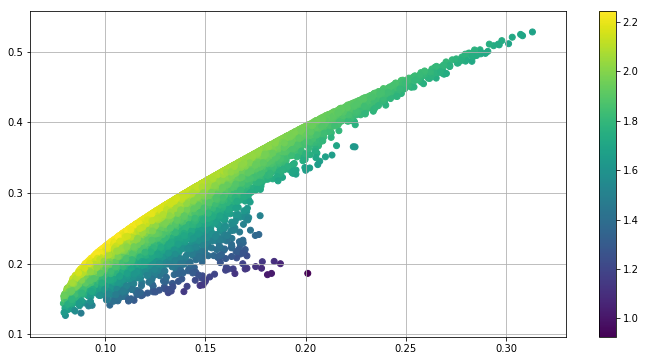

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(results_frame['주가변동성(stdev)'],     # X축 : 변동률
            results_frame['수익평균(return)'],      # Y축 : 연간 수익률 (일평균 * 252)
            c = results_frame['샤프지수(sharpe)'])  # cmap = 'RdYlBu' (칼라 팔렛트) : 샤프지수
plt.grid(); plt.colorbar()

<br>
### **04 몬테카를로 포트폴리오 최적값 계산**
1. 샤프지수가 최대인 포트폴리오
1. 표준편차가 최소인 포트폴리오 

In [122]:
results_frame['샤프지수(sharpe)'].idxmax()

18909

In [123]:
results_frame['샤프지수(sharpe)'].idxmin()

12938

In [124]:
results_frame.iloc[8056, :]

수익평균(return)    0.248694
주가변동성(stdev)    0.116056
샤프지수(sharpe)    2.142878
000660.KS       0.088347
005930.KS       0.351703
GM              0.188496
KO              0.371454
Name: 8056, dtype: float64

In [125]:
max_sharpe_port = results_frame.iloc[results_frame['샤프지수(sharpe)'].idxmax()]  # 사프지수 최대값인 인자값을 추출
max_sharpe_port

수익평균(return)    0.225091
주가변동성(stdev)    0.100254
샤프지수(sharpe)    2.245202
000660.KS       0.137873
005930.KS       0.178451
GM              0.175585
KO              0.508091
Name: 18909, dtype: float64

In [126]:
min_vol_port    = results_frame.iloc[results_frame['주가변동성(stdev)'].idxmin()] # 표준편차가 최소인 인자값을 추출
min_vol_port

수익평균(return)    0.143465
주가변동성(stdev)    0.079107
샤프지수(sharpe)    1.813556
000660.KS       0.007963
005930.KS       0.089587
GM              0.180760
KO              0.721691
Name: 755, dtype: float64

<br>
### **05 몬테카를로 포트폴리오 최적값 시각화**
1. 샤프지수가 최대인 포트폴리오
1. 표준편차가 최소인 포트폴리오 

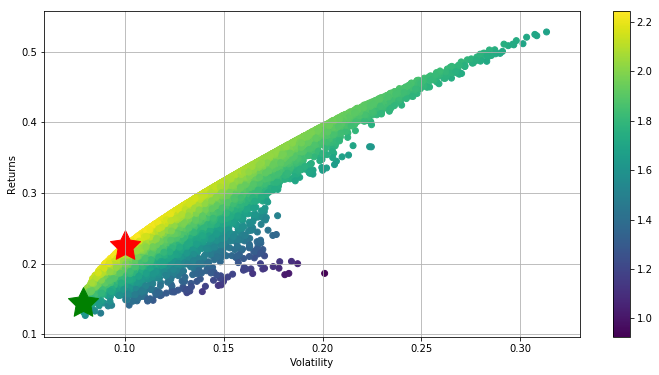

In [128]:
# create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(12,6)); plt.grid()

plt.scatter(results_frame['주가변동성(stdev)'], 
            results_frame['수익평균(return)'],
            c = results_frame['샤프지수(sharpe)'])#,cmap = 'RdYlBu')

plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

# 샤프지수가 최대인 위치에 별을 표시하기 : 빨간색
plt.scatter(max_sharpe_port[1], max_sharpe_port[0],
            marker = (5,1,0), color = 'r', s = 1000)

# 포트폴리오 분산이 최소인 위치에 표시하기 : 녹색
plt.scatter(min_vol_port[1],  min_vol_port[0],
            marker = (5,1,0), color = 'g', s = 1000)

<br>
### **05 몬테카를로 포트폴리오 비율출력**
1. 샤프지수가 최대인 포트폴리오
1. 표준편차가 최소인 포트폴리오 

In [129]:
# 사프지수 최대로 갖는 포트폴리오 비율 	
print(max_sharpe_port)

수익평균(return)    0.225091
주가변동성(stdev)    0.100254
샤프지수(sharpe)    2.245202
000660.KS       0.137873
005930.KS       0.178451
GM              0.175585
KO              0.508091
Name: 18909, dtype: float64


In [130]:
# 변동성을 최소로 갖는 포트폴리오 비율
print(min_vol_port)

수익평균(return)    0.143465
주가변동성(stdev)    0.079107
샤프지수(sharpe)    1.813556
000660.KS       0.007963
005930.KS       0.089587
GM              0.180760
KO              0.721691
Name: 755, dtype: float64
